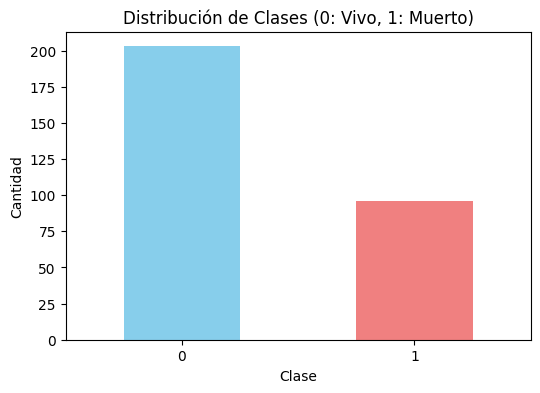

Accuracy con parámetros por defecto: 0.7333333333333333
Accuracy con max_depth=3, min_samples_split=2, min_samples_leaf=1: 0.7833333333333333
Accuracy con max_depth=3, min_samples_split=2, min_samples_leaf=2: 0.8
Accuracy con max_depth=3, min_samples_split=2, min_samples_leaf=4: 0.8
Accuracy con max_depth=3, min_samples_split=5, min_samples_leaf=1: 0.7833333333333333
Accuracy con max_depth=3, min_samples_split=5, min_samples_leaf=2: 0.8
Accuracy con max_depth=3, min_samples_split=5, min_samples_leaf=4: 0.8
Accuracy con max_depth=3, min_samples_split=10, min_samples_leaf=1: 0.7833333333333333
Accuracy con max_depth=3, min_samples_split=10, min_samples_leaf=2: 0.8
Accuracy con max_depth=3, min_samples_split=10, min_samples_leaf=4: 0.8
Accuracy con max_depth=5, min_samples_split=2, min_samples_leaf=1: 0.6666666666666666
Accuracy con max_depth=5, min_samples_split=2, min_samples_leaf=2: 0.7166666666666667
Accuracy con max_depth=5, min_samples_split=2, min_samples_leaf=4: 0.7166666666666667

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataframe
df = pd.read_csv('heart_failure_dataset.csv')

# Paso 2: Graficar la distribución de clases
plt.figure(figsize=(6, 4))
df['DEATH_EVENT'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de Clases (0: Vivo, 1: Muerto)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

# Paso 3: Partición del dataset en conjunto de entrenamiento y test (estratificada)
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Paso 4: Ajustar un árbol de decisión y calcular el accuracy sobre el conjunto de test
def train_decision_tree(max_depth=None, min_samples_split=2, min_samples_leaf=1):
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, model

# Entrenar el árbol de decisión con parámetros por defecto
accuracy_default, _ = train_decision_tree()
print(f'Accuracy con parámetros por defecto: {accuracy_default}')

# Prueba de ajustar los parámetros
max_depth_values = [3, 5, 7, 10, None]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

best_accuracy = 0
best_model = None
best_params = None

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            accuracy, model = train_decision_tree(max_depth, min_samples_split, min_samples_leaf)
            print(f'Accuracy con max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}: {accuracy}')

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

print(f'\nMejor accuracy alcanzado: {best_accuracy} con parámetros: {best_params}')